# Itají Buoy - Quality Control Analysis

## Import libs

In [18]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [51]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
itajai_0_lims = pnboia_limits_tests.itajai

In [52]:
buoys_df_raw.index.levels[0].unique()

Index(['cabofrio', 'cabofrio2', 'fortaleza', 'itaguai', 'itajai_0', 'itaoca',
       'minuano', 'niteroi', 'ocas', 'porto_seguro', 'recife', 'rio_grande',
       'santos', 'vitoria'],
      dtype='object', name='buoy')

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [59]:
# filter data with

itajai_0 = filter_data(data=buoys_df_raw,
                    buoy='itajai_0',
                    limits=itajai_0_lims,
                    outlier_check=False,
                    t_continuity_check=False)

itajai_0 = itajai_0.drop(columns=itajai_0.filter(regex='dir|head|spread').columns)

# Filter bad period
# itajai_0 = itajai_0.loc[:'2017-05']

# Filter bad srad data
itajai_0['srad'] = itajai_0['srad'].where((itajai_0['srad'] > -0.1) & (itajai_0['srad'] < 1500))

# # Drop all-nans columns
# itajai_0.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

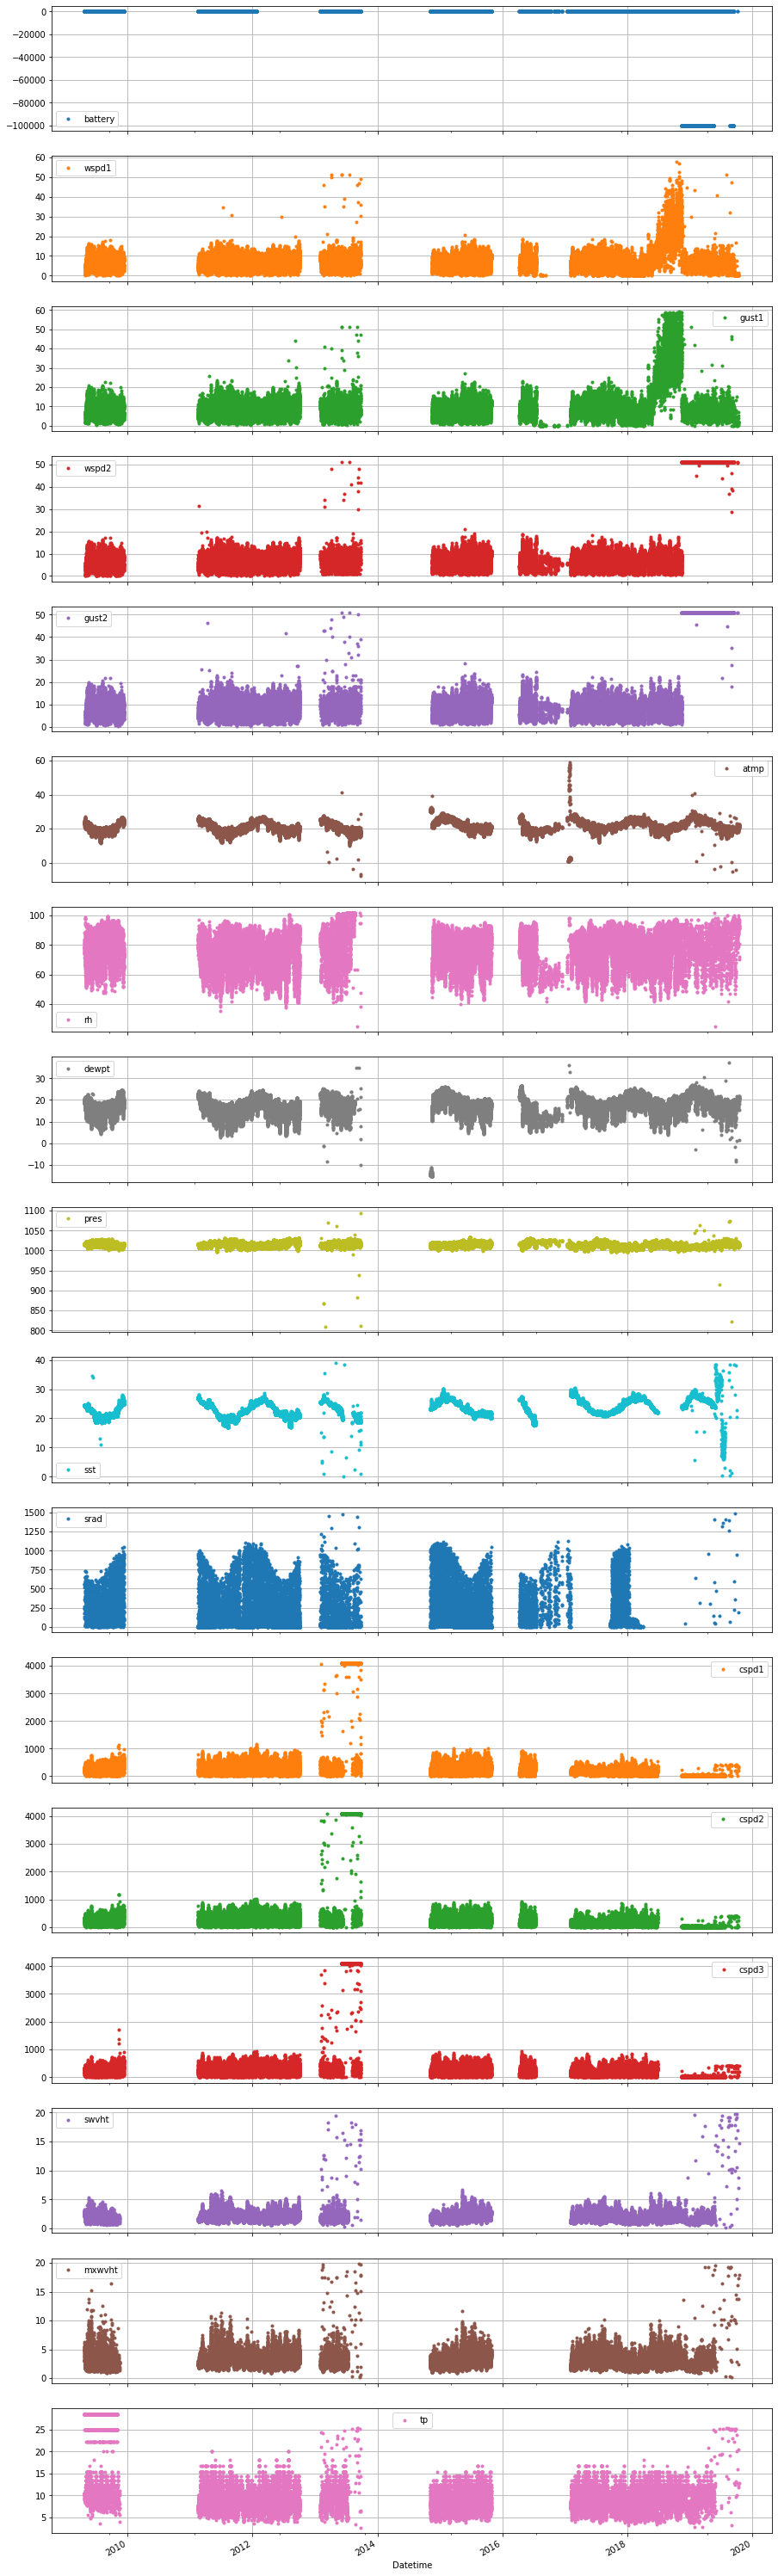

In [60]:
itajai_0.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

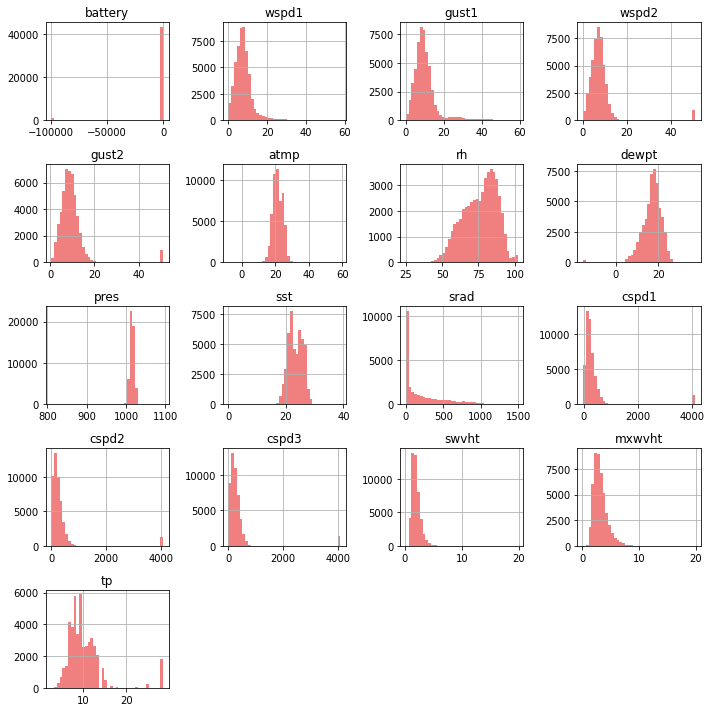

In [61]:
itajai_0.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [62]:
# Generated lims
itajai_0_out_lims_df_3 = gen_outlier_lim(itajai_0, buoy_name='itajai_0', std_factor=3).round(1)

# Generate lims dict
itajai_0_out_lims_dict_3 = manual_outlier_lims(itajai_0_out_lims_df_3, buoy_name='itajai_0')

# filter data with
itajai_03 = filter_data(data=itajai_0,
                    buoy='itajai_0',
                    limits=itajai_0_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=itajai_0_out_lims_dict_3)

outlier_check done.


In [63]:
# Generated lims
itajai_0_out_lims_df_5 = gen_outlier_lim(itajai_0, buoy_name='itajai_0', std_factor=5).round(1)

# Generate lims dict
itajai_0_out_lims_dict_5 = manual_outlier_lims(itajai_0_out_lims_df_5, buoy_name='itajai_0')

# filter data with
itajai_02 = filter_data(data=itajai_0,
                    buoy='itajai_0',
                    limits=itajai_0_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=itajai_0_out_lims_dict_5)

outlier_check done.


In [64]:
itajai_0_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,8.0,4.9,3.0,14.8,0.0,22.7
gust1,10.5,7.3,3.0,21.8,0.0,32.3
wspd2,7.8,6.8,3.0,20.3,0.0,28.1
gust2,9.5,6.8,3.0,20.4,0.0,29.9
atmp,21.7,3.1,3.0,9.4,12.3,31.1
rh,76.0,11.5,3.0,34.4,41.6,110.3
dewpt,17.0,4.5,3.0,13.6,3.5,30.6
pres,1015.3,5.9,3.0,17.6,997.8,1032.9
sst,23.4,2.6,3.0,7.9,15.5,31.3


In [65]:
itajai_0_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,8.0,4.9,5.0,24.6,0.0,32.6
gust1,10.5,7.3,5.0,36.3,0.0,46.9
wspd2,7.8,6.8,5.0,33.8,0.0,41.6
gust2,9.5,6.8,5.0,34.0,0.0,43.5
atmp,21.7,3.1,5.0,15.6,6.1,37.3
rh,76.0,11.5,5.0,57.3,18.7,133.3
dewpt,17.0,4.5,5.0,22.6,0.0,39.6
pres,1015.3,5.9,5.0,29.3,986.0,1044.6
sst,23.4,2.6,5.0,13.2,10.2,36.5


# Testing generated limits

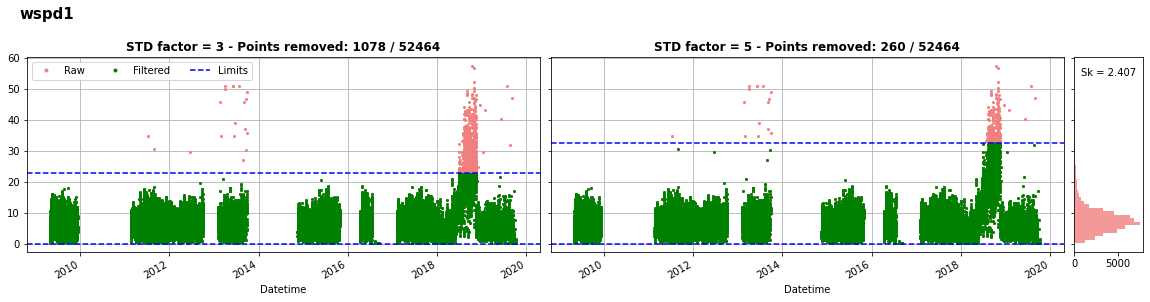

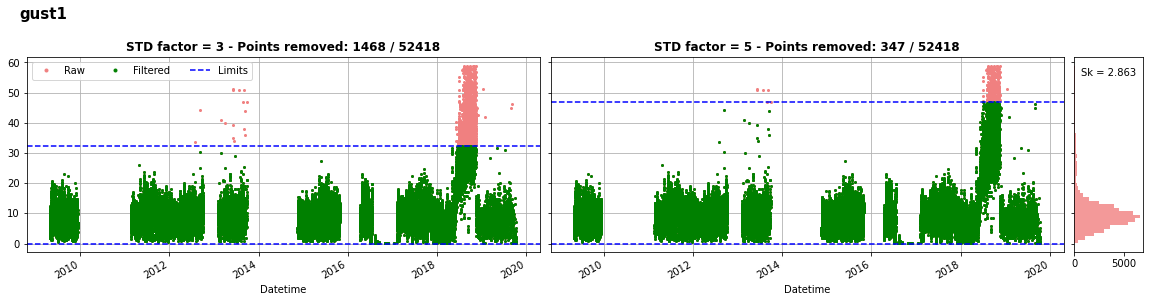

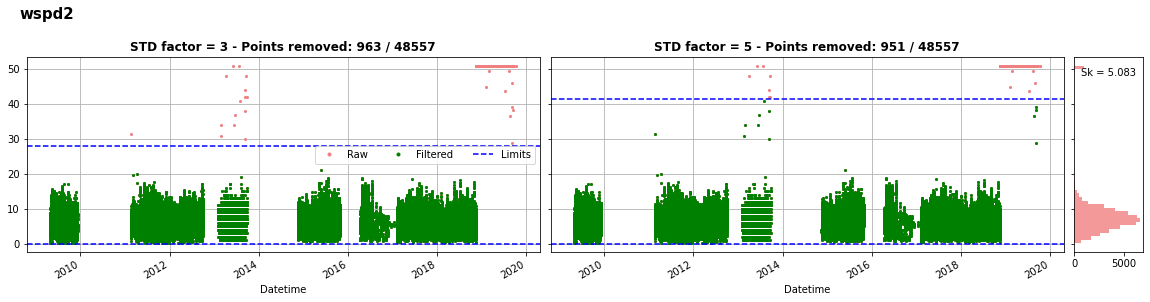

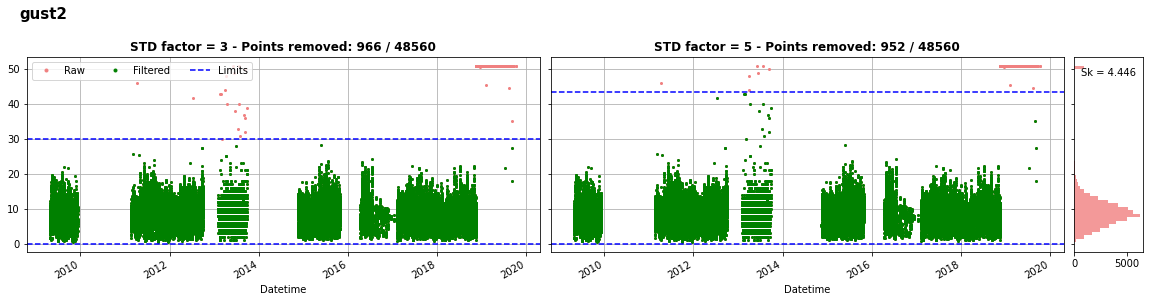

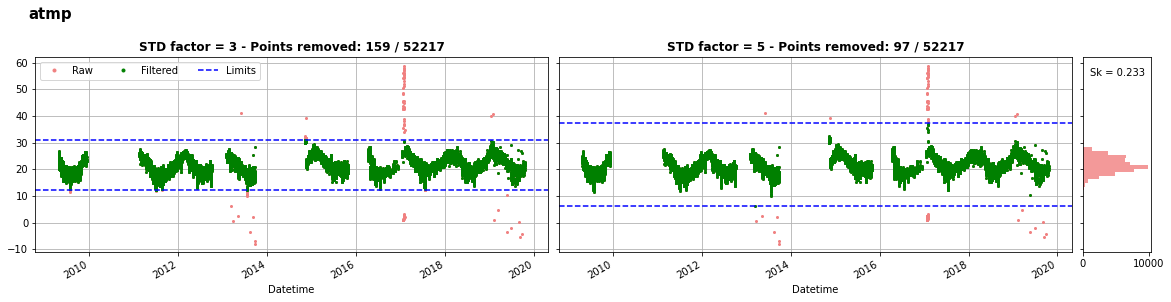

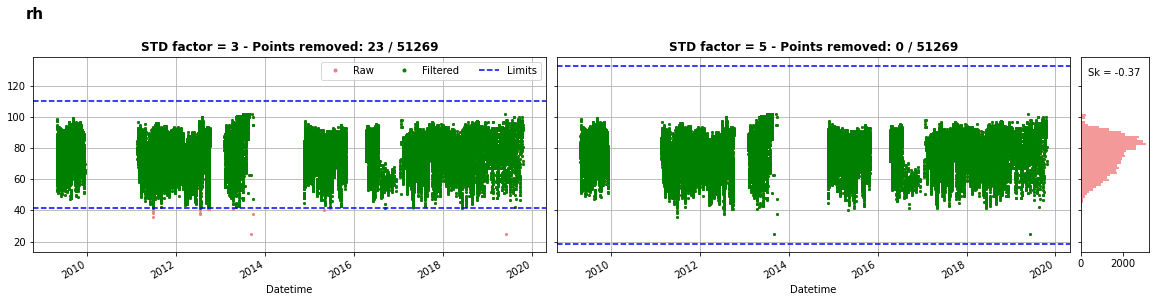

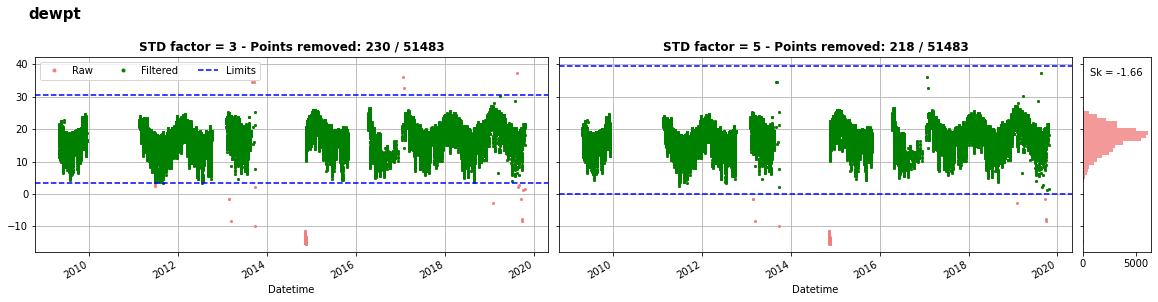

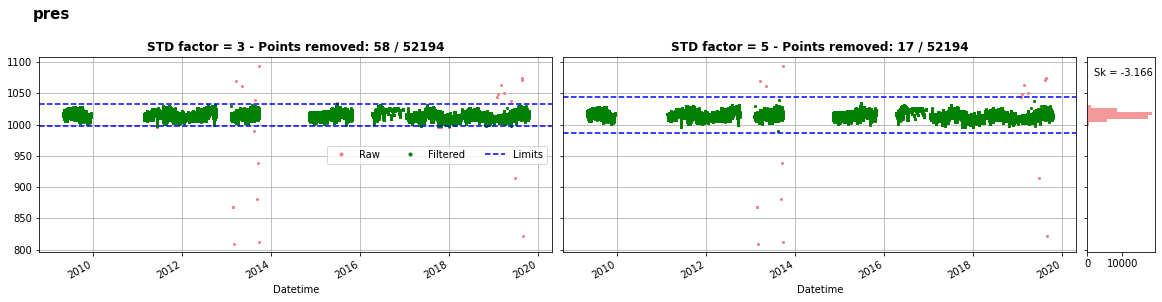

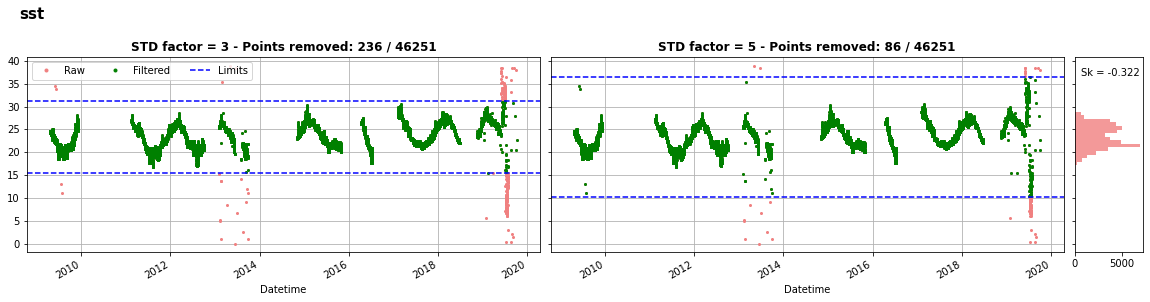

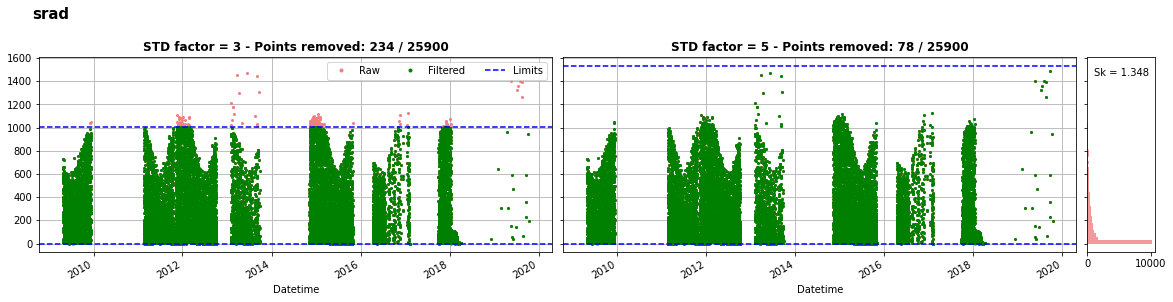

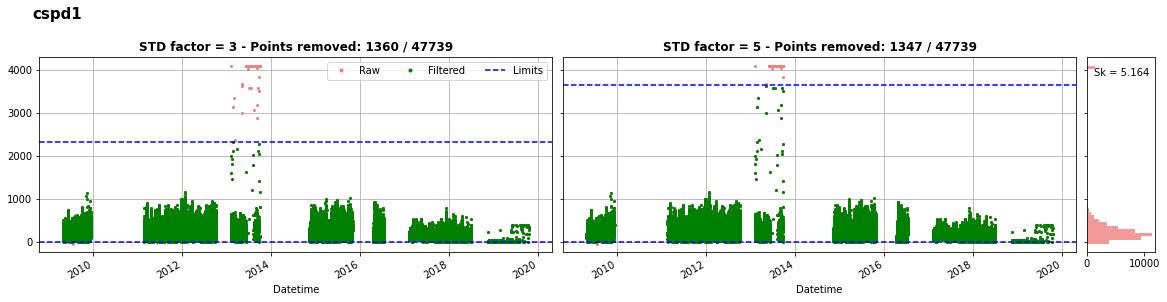

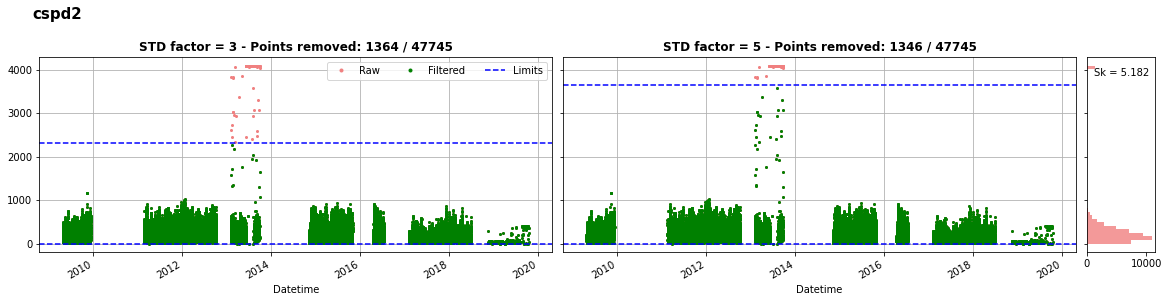

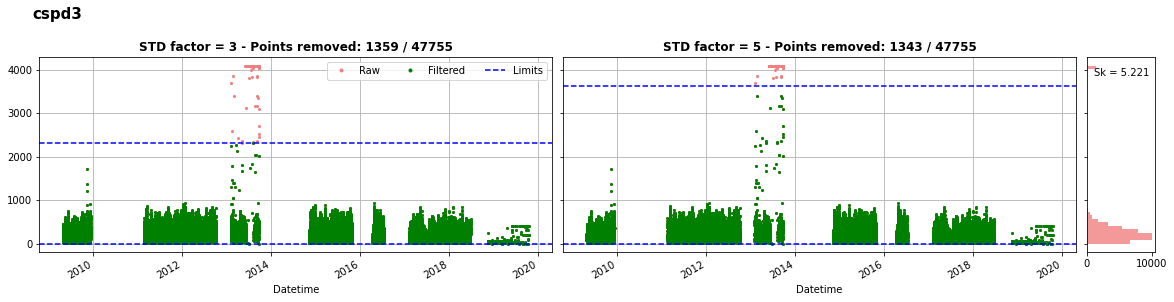

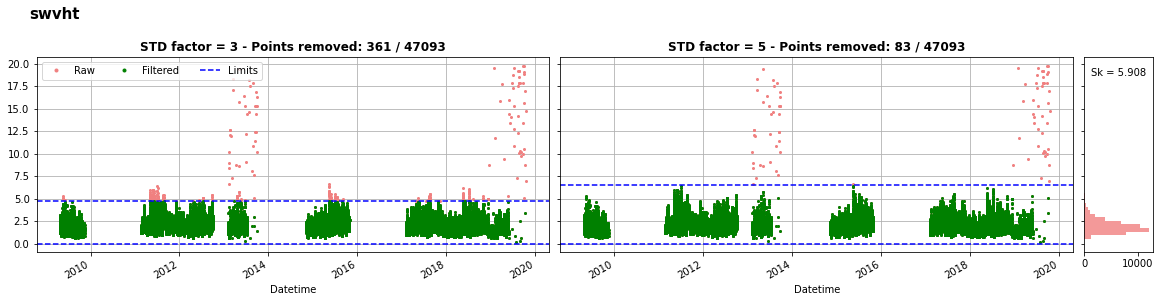

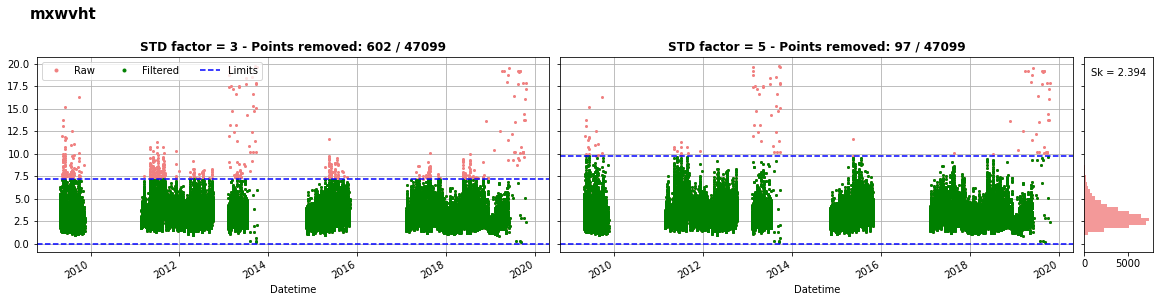

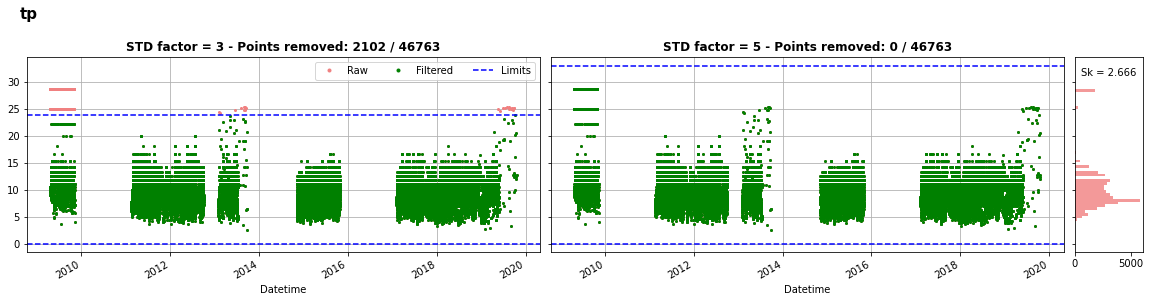

In [66]:
parameters = itajai_0.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=itajai_0,
                    limits=itajai_0_lims,
                    buoy='itajai_0',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

In [67]:
itajai_0.columns

Index(['battery', 'wspd1', 'gust1', 'wspd2', 'gust2', 'atmp', 'rh', 'dewpt',
       'pres', 'sst', 'srad', 'cspd1', 'cspd2', 'cspd3', 'swvht', 'mxwvht',
       'tp'],
      dtype='object')

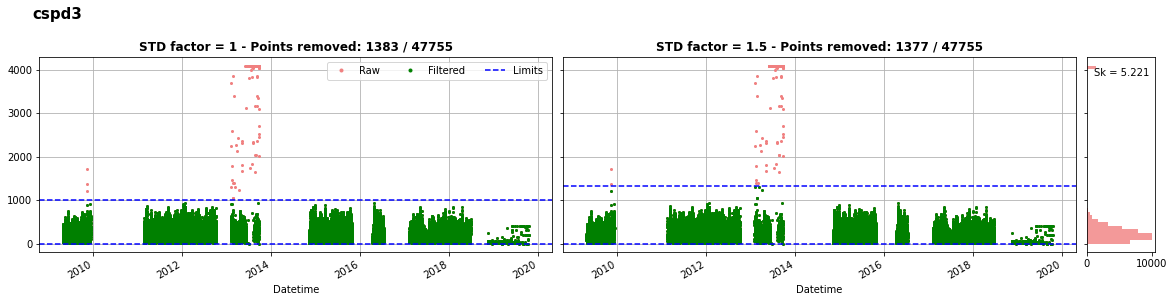

In [86]:
param = 'cspd3'
plot_comparison(factor1=1, 
                    factor2=1.5, 
                    data=itajai_0,
                    limits=itajai_0_lims,
                    buoy='itajai_0',
                    parameter=param)
plt.show()

In [87]:
factors = {
    "swvht": 6,
    "mxwvht": 8,
    "tp": 2,
    "wspd1": 3,
    "gust1": 2,
    "wspd2": 2,
    "gust2": 2,
    "atmp": 3.5,
    "rh": 4,
    "srad": 4,
    "pres": 5,
    "dewpt": 3.5,
    "sst": 3.5,
    "tp": 2.2,
    "cspd1": 1.5,
    "cspd2": 1.5,
    "cspd3": 1,
    }

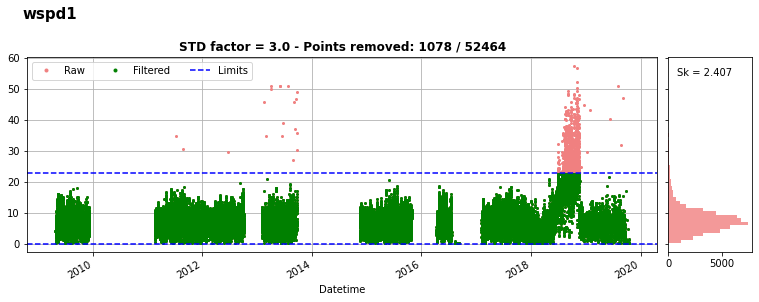

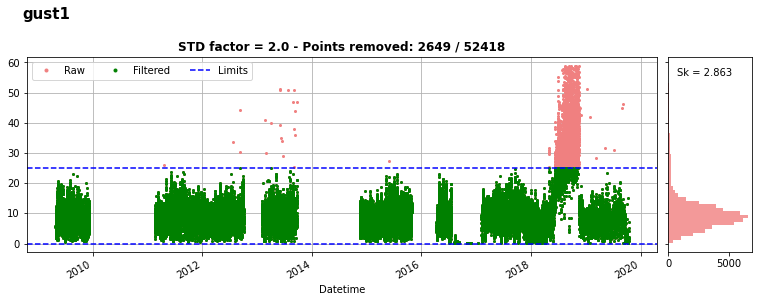

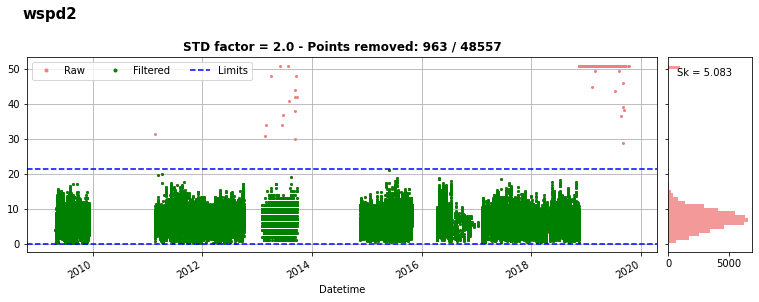

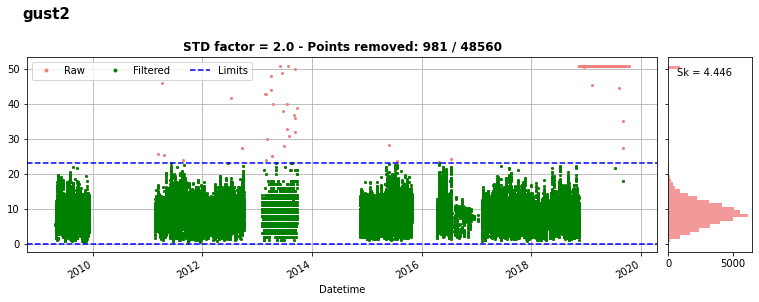

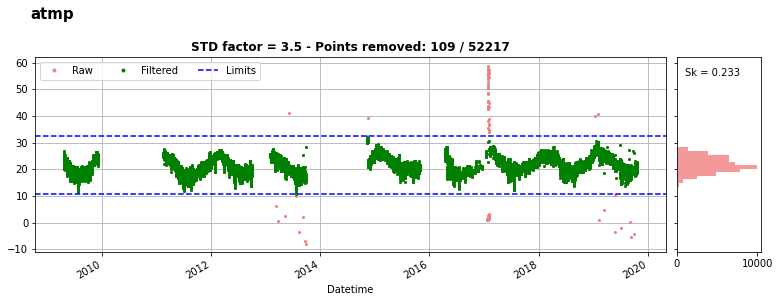

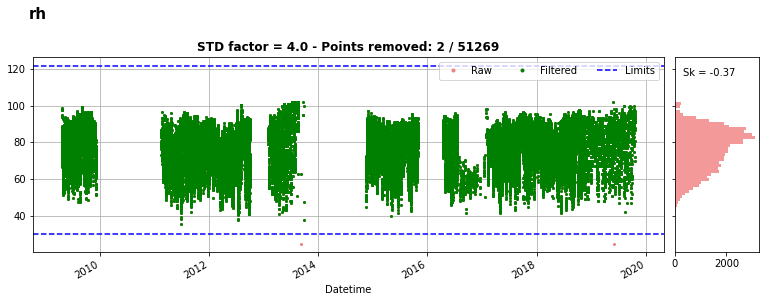

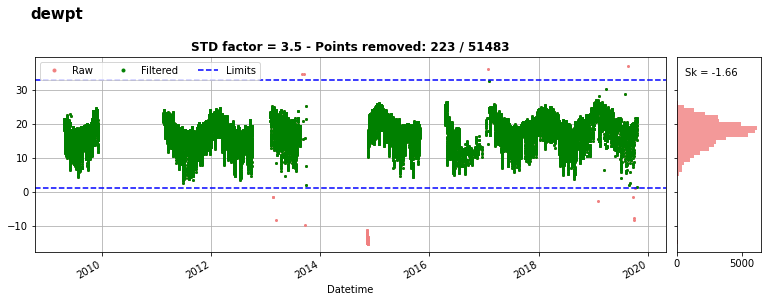

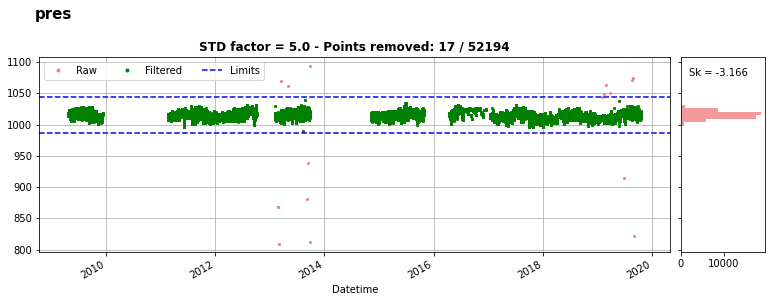

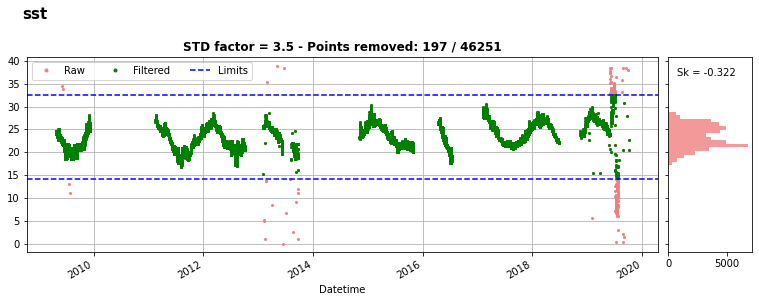

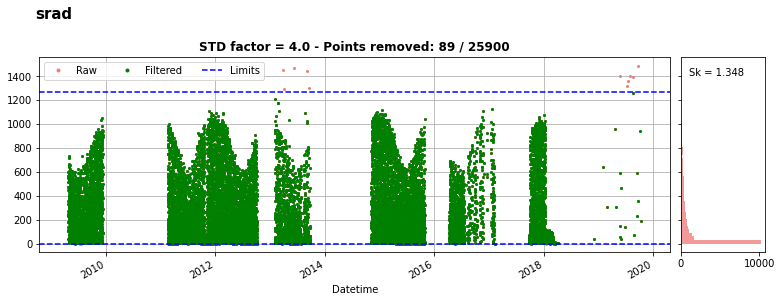

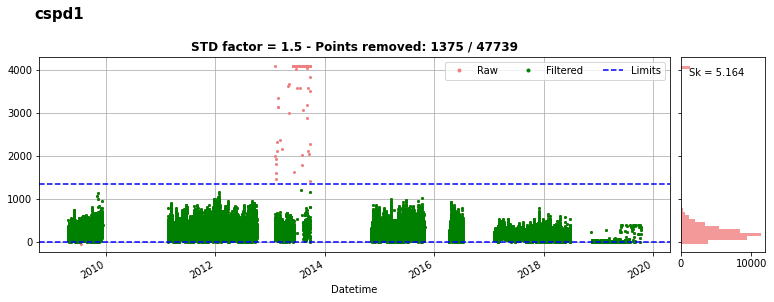

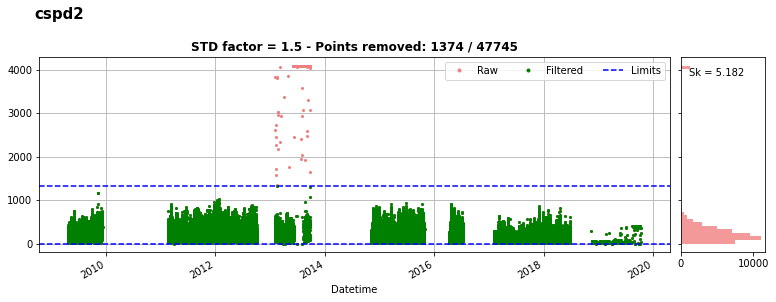

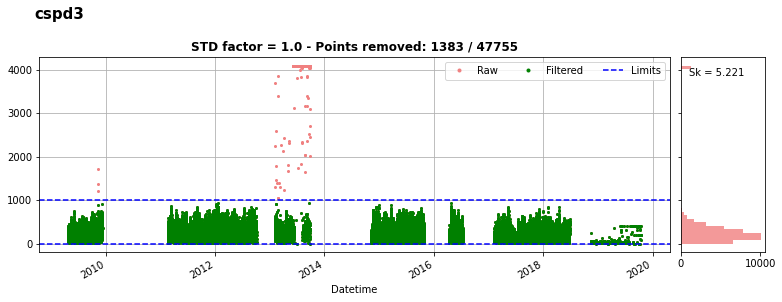

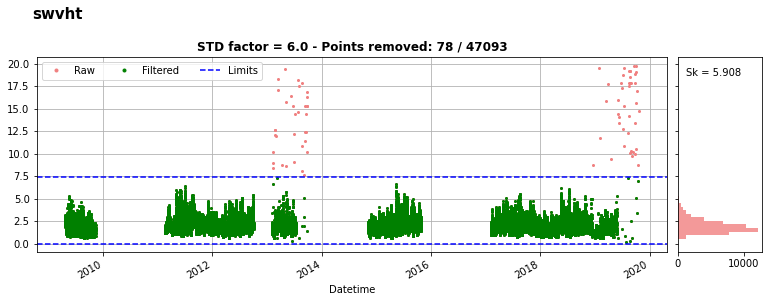

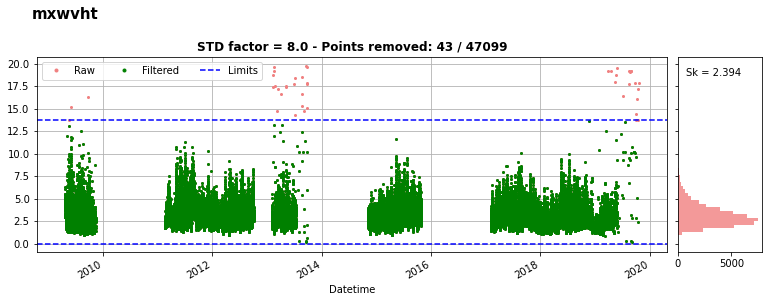

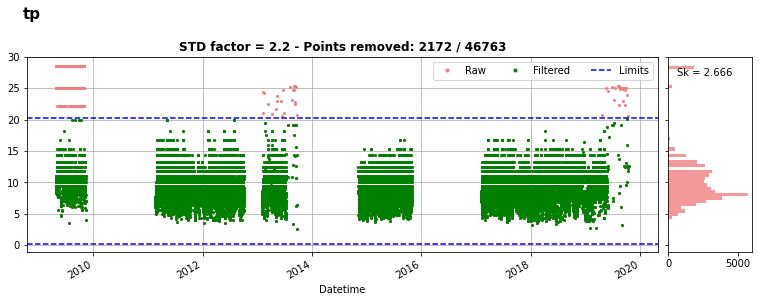

In [88]:
# FILTERING WITH DEFINITIVE FACTORS
itajai_0_notdir = itajai_0.drop(columns=itajai_0.filter(regex='dir|head|spread').columns)
parameters = itajai_0_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=itajai_0,
                    limits=itajai_0_lims,
                    buoy='itajai_0',
                    parameter=param)
    plt.show()

In [89]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    "swvht": 6,
    "mxwvht": 8,
    "tp": 2,
    "wspd1": 3,
    "gust1": 2,
    "wspd2": 2,
    "gust2": 2,
    "atmp": 3.5,
    "rh": 4,
    "srad": 4,
    "pres": 5,
    "dewpt": 3.5,
    "sst": 3.5,
    "tp": 2.2,
    "cspd1": 1.5,
    "cspd2": 1.5,
    "cspd3": 1,
    }

itajai_0_out_lims_df = gen_outlier_lim(data=itajai_0,
                                     buoy_name='itajai_0',
                                     std_factor=factors).round(1)

In [90]:
itajai_0_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,8.0,4.9,3.0,14.8,0.0,22.7
gust1,10.5,7.3,2.0,14.5,0.0,25.1
wspd2,7.8,6.8,2.0,13.5,0.0,21.4
gust2,9.5,6.8,2.0,13.6,0.0,23.1
atmp,21.7,3.1,3.5,10.9,10.8,32.7
rh,76.0,11.5,4.0,45.8,30.1,121.8
dewpt,17.0,4.5,3.5,15.8,1.2,32.9
pres,1015.3,5.9,5.0,29.3,986.0,1044.6
sst,23.4,2.6,3.5,9.2,14.1,32.6


In [91]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS
itajai_0_out_lims_dict = manual_outlier_lims(itajai_0_out_lims_df, buoy_name='itajai_0')

In [92]:
itajai_0_out_lims_dict

{'wspd1': [0.0, 22.7],
 'gust1': [0.0, 25.1],
 'wspd2': [0.0, 21.4],
 'gust2': [0.0, 23.1],
 'atmp': [10.8, 32.7],
 'rh': [30.1, 121.8],
 'dewpt': [1.2, 32.9],
 'pres': [986.0, 1044.6],
 'sst': [14.1, 32.6],
 'srad': [0.0, 1271.2],
 'cspd1': [0.0, 1340.7],
 'cspd2': [0.0, 1332.5],
 'cspd3': [0.0, 1005.0],
 'swvht': [0.0, 7.4],
 'mxwvht': [0.0, 13.7],
 'tp': [0.3, 20.3]}

In [93]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
itajai_0_definitive = filter_data(data=buoys_df_raw,
                    buoy='itajai_0',
                    limits=itajai_0_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=itajai_0_out_lims_dict)

outlier_check done.
